In [2]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=0B-Eiyn-CUQtxdUZWMkFfQzdObUE' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=0B-Eiyn-CUQtxdUZWMkFfQzdObUE" -O data.zip && rm -rf /tmp/cookies.txt

--2018-06-06 04:11:19--  https://docs.google.com/uc?export=download&confirm=i9G7&id=0B-Eiyn-CUQtxdUZWMkFfQzdObUE
Resolving docs.google.com (docs.google.com)... 74.125.141.101, 74.125.141.113, 74.125.141.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.141.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/54dpmkgvcclh199hev3qqpj7hk26u2cn/1528257600000/06665218344850078706/*/0B-Eiyn-CUQtxdUZWMkFfQzdObUE?e=download [following]
--2018-06-06 04:11:19--  https://doc-14-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/54dpmkgvcclh199hev3qqpj7hk26u2cn/1528257600000/06665218344850078706/*/0B-Eiyn-CUQtxdUZWMkFfQzdObUE?e=download
Resolving doc-14-a0-docs.googleusercontent.com (doc-14-a0-docs.googleusercontent.com)... 74.125.141.132, 2607:f8b0:400c:c06::84
Connecting to doc-14-a0-docs.googleusercontent.com (doc-14-a0-doc

In [13]:
import os
os.chdir('real_training_data')


In [14]:
!ls

green  nolight	real_data_annotations.yaml  red  unidentified  yellow


In [20]:
!ls

green  nolight	real_data_annotations.yaml  red  unidentified  yellow


In [23]:
!pwd


/content/data


In [22]:
import os
os.chdir('..')

In [21]:
%matplotlib inline
from IPython.display import display, HTML

# Standard imports
import logging
import glob
import os

# Dependecy imports
import matplotlib.pyplot as plt

from sklearn.utils import shuffle

import keras.backend.tensorflow_backend as K

K_CONFIG = K.tf.ConfigProto()
K_CONFIG.allow_soft_placement = True
K_CONFIG.gpu_options.allow_growth = True
K.set_session(K.tf.Session(config=K_CONFIG))

Using TensorFlow backend.


In [25]:
import glob
red_paths = glob.glob('real_training_data/red/*.jpg')# += glob.glob('sim_training_data/red/*.jpg')
non_red_paths = glob.glob('real_training_data/green/*.jpg')# += glob.glob('sim_training_data/green/*.jpg')
non_red_paths += glob.glob('real_training_data/yellow/*.jpg')
non_red_paths += glob.glob('real_training_data/unidentified/*.jpg')
non_red_paths += glob.glob('real_training_data/nolight/*.jpg')

In [26]:
labels = []

red = 0
non_red = 0

for path in red_paths:
        labels.append(0)
        red += 1
      
for path in non_red_paths:
        labels.append(1)
        non_red += 1

In [28]:

im_paths=red_paths + non_red_paths
print('red', red, 'non_red', non_red)
print(len(im_paths))
print(len(labels))

red 186 non_red 524
710
710


In [29]:
import cv2
import numpy as np
width = 400
height = 300

images = []

for path in im_paths:

    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_res = cv2.resize(img, (width, height))
    
    images.append(img_res)

In [30]:
images = np.asarray(images)
print(images.shape, images.dtype)

labels = np.asarray(labels)
print(labels.shape, labels.dtype)

(710, 300, 400, 3) uint8
(710,) int64


In [31]:
images, labels = shuffle(images, labels)

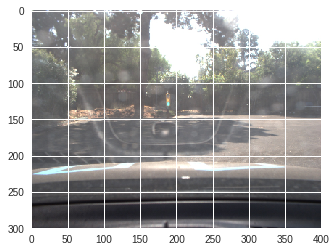

1


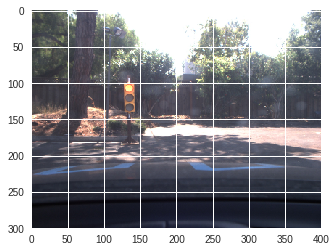

0


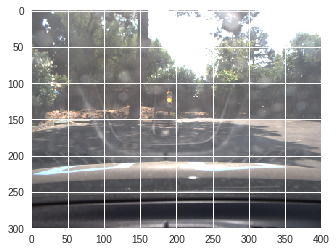

1


In [33]:

plt.imshow(images[6])
plt.show()
print(labels[6])
plt.imshow(images[50])
plt.show()
print(labels[50])
plt.imshow(images[30])
plt.show()
print(labels[30])

In [34]:
print(labels)

[1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0
 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0
 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1
 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1
 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0
 1 1 1 1 1 1 1 0 1 0 1 1 

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import adam
from keras.utils.data_utils import Sequence

In [44]:
activation = 'relu'
dropout = 1

def model(dshape):
    """Create keras model.

    Based on : https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/
    """
    seq_model = Sequential()

    seq_model.add(BatchNormalization(input_shape=(dshape[0], dshape[1], dshape[2])))
    seq_model.add(Conv2D(24, (5, 5), padding='valid',
                  activation=activation, strides=(2, 2)))

    seq_model.add(Conv2D(36, (5, 5), padding='valid', activation=activation, strides=(2, 2)))
    seq_model.add(Dropout(0.6))
    seq_model.add(Conv2D(48, (5, 5), padding='valid', activation=activation, strides=(2, 2)))
    seq_model.add(Dropout(0.6))
    seq_model.add(Conv2D(64, (3, 3), padding='valid', activation=activation))
    seq_model.add(Dropout(0.6))
    seq_model.add(Conv2D(64, (3, 3), padding='valid', activation=activation))
    seq_model.add(Conv2D(64, (3, 3), padding='valid', activation=activation))
    seq_model.add(Flatten())
    seq_model.add(Dropout(0.6))
    seq_model.add(Dense(100, activation=activation))
    seq_model.add(Dropout(0.5))
    seq_model.add(Dense(50, activation=activation))
    seq_model.add(Dropout(0.3))
    seq_model.add(Dense(10, activation=activation))
    seq_model.add(Dense(1, activation='sigmoid'))
    seq_model.compile(loss='binary_crossentropy', optimizer=adam(), metrics=['accuracy'])
    seq_model.summary()

    return seq_model


In [45]:
keras_model = model((height, width, 3))  # creates model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 300, 400, 3)       12        
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 148, 198, 24)      1824      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 97, 36)        21636     
_________________________________________________________________
dropout_7 (Dropout)          (None, 72, 97, 36)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 47, 48)        43248     
_________________________________________________________________
dropout_8 (Dropout)          (None, 34, 47, 48)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 45, 64)        27712     
__________

In [46]:
keras_model.fit(images, labels, epochs=15, batch_size=16, verbose=1, shuffle=True, validation_split=0.2)

Train on 568 samples, validate on 142 samples
Epoch 1/15
568/568 [==============================] - 101s 178ms/step - loss: 0.6902 - acc: 0.7148 - val_loss: 0.6638 - val_acc: 0.7676
Epoch 2/15
568/568 [==============================] - 99s 175ms/step - loss: 0.5972 - acc: 0.7306 - val_loss: 0.6412 - val_acc: 0.7676
Epoch 3/15
568/568 [==============================] - 99s 175ms/step - loss: 0.5934 - acc: 0.7306 - val_loss: 0.6149 - val_acc: 0.7676
Epoch 4/15
568/568 [==============================] - 100s 176ms/step - loss: 0.5662 - acc: 0.7306 - val_loss: 0.5079 - val_acc: 0.7676
Epoch 5/15
568/568 [==============================] - 100s 176ms/step - loss: 0.5423 - acc: 0.7306 - val_loss: 0.4207 - val_acc: 0.7676
Epoch 6/15
464/568 [=======================>......] - ETA: 16s - loss: 0.4867 - acc: 0.7349

568/568 [==============================] - 100s 176ms/step - loss: 0.4765 - acc: 0.7430 - val_loss: 0.3905 - val_acc: 0.7817
Epoch 7/15
568/568 [==============================] - 100s 177ms/step - loss: 0.3696 - acc: 0.7782 - val_loss: 0.2604 - val_acc: 0.8521
Epoch 8/15
568/568 [==============================] - 100s 175ms/step - loss: 0.4131 - acc: 0.8116 - val_loss: 0.2541 - val_acc: 0.8592
Epoch 9/15
568/568 [==============================] - 99s 175ms/step - loss: 0.3717 - acc: 0.8380 - val_loss: 0.1967 - val_acc: 0.9225
Epoch 10/15
568/568 [==============================] - 100s 175ms/step - loss: 0.2642 - acc: 0.8715 - val_loss: 0.1460 - val_acc: 0.9225
Epoch 11/15
568/568 [==============================] - 99s 175ms/step - loss: 0.2148 - acc: 0.9014 - val_loss: 0.1198 - val_acc: 0.9930
Epoch 12/15
144/568 [======>.......................] - ETA: 1:08 - loss: 0.1506 - acc: 0.9236

568/568 [==============================] - 99s 175ms/step - loss: 0.1841 - acc: 0.9102 - val_loss: 0.0626 - val_acc: 1.0000
Epoch 13/15
568/568 [==============================] - 99s 175ms/step - loss: 0.1255 - acc: 0.9489 - val_loss: 0.0508 - val_acc: 1.0000
Epoch 14/15
568/568 [==============================] - 100s 176ms/step - loss: 0.1452 - acc: 0.9472 - val_loss: 0.0284 - val_acc: 1.0000
Epoch 15/15
568/568 [==============================] - 100s 176ms/step - loss: 0.0732 - acc: 0.9824 - val_loss: 0.0047 - val_acc: 1.0000


In [47]:
def save_keras_model(save_model, path):
    """Save keras model to given path."""
    save_model.save_weights(path + 'model.h5')

    with open(path + 'model.json', "w") as text_file:
        text_file.write(save_model.to_json())

    logging.info('Keras json model saved. %s', path + 'model.json')
    logging.info('Keras h5 model saved. %s', path + 'model.h5')

In [48]:
save_keras_model(keras_model, 'keras_traffic_light')

In [49]:
!ls


index.html		     keras_traffic_lightmodel.json  sim_training_data
keras_traffic_lightmodel.h5  real_training_data


In [51]:
from google.colab import files

with open('example.txt', 'w') as f:
  f.write('some content')

files.download('keras_traffic_lightmodel.json')